# Wage Gap Prediction

## Data preparation and cleaning

## 1 Import Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sklearn
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
from  sklearn import feature_selection 
from sklearn import linear_model
from sklearn import metrics
from pandas.stats.api import ols

## 2 Load CSVs

In [3]:
gender_data_raw = pd.read_csv('working_data\GenderStat_Data_new.csv',header=None,skiprows=0)

payment_gap_oecd_raw = pd.read_csv('working_data\Payment_gap_oecd.csv', header=None,skiprows = 1)
payment_gap_oecd_raw.head(10)

,0,1,2,3,4,5,6,7
0,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1975,21.582733,Australia
1,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1976,20.754717,Australia
2,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1977,18.390804,Australia
3,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1978,19.791666,Australia
4,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1979,20.000000,Australia
5,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1980,18.750000,Australia
6,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1981,18.253969,Australia
7,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1982,20.819113,Australia
8,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1983,19.155844,Australia
9,AUS,WAGEGAP,TOT,PC_MENWAGE,A,1984,18.674698,Australia


## 3 Travers years and indicator in GenderStats

In [5]:
gender_data_raw.drop(gender_data_raw.columns[[1,3]], axis=1, inplace=True)
gender_data_raw.loc[0,0] = 'country-full-name'

gender_data_raw.columns = gender_data_raw.loc[0]

gender_data_raw = pd.pivot_table(gender_data_raw,index ='country-full-name', columns='Indicator Name')

gender_data_raw = gender_data_raw.stack(level=0)
gender_data_raw.reset_index(inplace=True)
gender_data_raw.rename(columns={0:'Year'},inplace=True)
gender_data_raw.rename(columns={"Indicator Name":'Id'},inplace=True)
gender_data_raw.to_csv("newCsv.csv")


gender_stats_normalized = pd.read_csv("newCsv.csv")
gender_stats_normalized.drop(gender_stats_normalized.columns[[0]], axis=1, inplace=True)
gender_stats_normalized.head()

,country-full-name,Year,"Access to anti-retroviral drugs, female (%)","Access to anti-retroviral drugs, male (%)","Account at a financial institution, female (% age 15+) [ts]","Account at a financial institution, male (% age 15+) [ts]","Adolescent fertility rate (births per 1,000 women ages 15-19)","Age at first marriage, female","Age at first marriage, male",Age dependency ratio (% of working-age population),...,Women who own land both alone and jointly (% of women age 15-49): Q3,Women who own land both alone and jointly (% of women age 15-49): Q4,Women who own land both alone and jointly (% of women age 15-49): Q5 (highest),Women who own land jointly (% of women age 15-49),Women who own land jointly (% of women age 15-49): Q1 (lowest),Women who own land jointly (% of women age 15-49): Q2,Women who own land jointly (% of women age 15-49): Q3,Women who own land jointly (% of women age 15-49): Q4,Women who own land jointly (% of women age 15-49): Q5 (highest),Women who were first married by age 18 (% of women ages 20-24)
0,Australia,1960.0,NaN,NaN,NaN,NaN,44.8286,NaN,NaN,63.356535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,1961.0,NaN,NaN,NaN,NaN,45.0668,NaN,NaN,63.596913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,1962.0,NaN,NaN,NaN,NaN,45.3050,NaN,NaN,63.372475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,1963.0,NaN,NaN,NaN,NaN,45.9764,NaN,NaN,62.857899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,1964.0,NaN,NaN,NaN,NaN,46.6478,NaN,NaN,62.304998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

## 4 Adding Header to Data Files 

In [6]:
payment_gap_oecd_raw.columns = ['location', 'indicator', 'subject', 'measure', 'frequency', 'Year', 'WageGaP', 
                      'country-full-name']
payment_gap_oecd_raw = payment_gap_oecd_raw[payment_gap_oecd_raw['subject'] == 'TOT']

## 5 Intersect Countries and merge two csv's

In [7]:
#checking both csv's - country-full-name
#csv's - gender_stats_normalized, payment_gap_oecd_raw
new_data_raw = pd.merge(gender_stats_normalized, payment_gap_oecd_raw, how='inner', on=['country-full-name', 'Year'])
new_data_raw.head(10)

,country-full-name,Year,"Access to anti-retroviral drugs, female (%)","Access to anti-retroviral drugs, male (%)","Account at a financial institution, female (% age 15+) [ts]","Account at a financial institution, male (% age 15+) [ts]","Adolescent fertility rate (births per 1,000 women ages 15-19)","Age at first marriage, female","Age at first marriage, male",Age dependency ratio (% of working-age population),...,Women who own land jointly (% of women age 15-49): Q3,Women who own land jointly (% of women age 15-49): Q4,Women who own land jointly (% of women age 15-49): Q5 (highest),Women who were first married by age 18 (% of women ages 20-24),location,indicator,subject,measure,frequency,WageGaP
0,Australia,1975.0,NaN,NaN,NaN,NaN,38.5016,NaN,NaN,56.816075,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,21.582733
1,Australia,1976.0,NaN,NaN,NaN,NaN,35.1688,22.0,24.4,56.478399,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,20.754717
2,Australia,1977.0,NaN,NaN,NaN,NaN,31.8360,NaN,NaN,55.782389,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,18.390804
3,Australia,1978.0,NaN,NaN,NaN,NaN,30.6870,NaN,NaN,54.923225,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,19.791666
4,Australia,1979.0,NaN,NaN,NaN,NaN,29.5380,NaN,NaN,54.143916,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,20.000000
5,Australia,1980.0,NaN,NaN,NaN,NaN,28.3890,NaN,NaN,53.550174,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,18.750000
6,Australia,1981.0,NaN,NaN,NaN,NaN,27.2400,23.5,25.7,52.703024,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,18.253969
7,Australia,1982.0,NaN,NaN,NaN,NaN,26.0910,NaN,NaN,52.204834,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,20.819113
8,Australia,1983.0,NaN,NaN,NaN,NaN,25.0928,NaN,NaN,51.904419,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,19.155844
9,Australia,1984.0,NaN,NaN,NaN,NaN,24.0946,NaN,NaN,51.574265,...,NaN,NaN,NaN,NaN,AUS,WAGEGAP,TOT,PC_MENWAGE,A,18.674698


## 6 Drop unnecessary columns payment_gap_oecd_raw

In [8]:
new_data_raw.drop('subject', axis=1, inplace=True)
new_data_raw.drop('indicator', axis=1, inplace=True)
new_data_raw.drop('location', axis=1, inplace=True)
new_data_raw.drop('frequency', axis=1, inplace=True)
new_data_raw.drop('measure', axis=1, inplace=True)

#thresh is the minimum number of non NAN values
new_data_raw = new_data_raw.dropna(1,thresh = new_data_raw.shape[0] * 90 / 100)

In [9]:
new_data_raw.head(10)

,country-full-name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age population, age 0, female, interpolated","Age population, age 0, male, interpolated","Age population, age 01, female, interpolated","Age population, age 01, male, interpolated","Age population, age 02, female, interpolated","Age population, age 02, male, interpolated",...,"Self-employed, male (% of males employed)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)","Wage and salaried workers, female (% of females employed)","Wage and salary workers, male (% of males employed)",WageGaP
0,Australia,1975.0,38.5016,56.816075,129221.0,135399.0,126229.0,131931.0,124053.0,129490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.582733
1,Australia,1976.0,35.1688,56.478399,123159.0,129271.0,128242.0,134262.0,126207.0,131859.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.754717
2,Australia,1977.0,31.8360,55.782389,114477.0,120394.0,117271.0,122814.0,127496.0,133349.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.390804
3,Australia,1978.0,30.6870,54.923225,105208.0,110885.0,111670.0,117102.0,116783.0,122087.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.791666
4,Australia,1979.0,29.5380,54.143916,98219.0,103715.0,107201.0,112581.0,114299.0,119622.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000
5,Australia,1980.0,28.3890,53.550174,95529.0,100981.0,104981.0,110401.0,112508.0,117925.0,...,17.799999,7.9,5.1,6.1,13.9,11.4,12.500000,87.099998,82.199997,18.750000
6,Australia,1981.0,27.2400,52.703024,98291.0,103710.0,98536.0,104011.0,106417.0,111875.0,...,17.299999,7.4,4.8,5.8,12.9,10.2,11.400000,87.300003,82.699997,18.253969
7,Australia,1982.0,26.0910,52.204834,105328.0,110843.0,108584.0,114060.0,101377.0,106914.0,...,17.400000,8.5,6.4,7.2,14.5,13.3,13.800000,87.300003,82.599998,20.819113
8,Australia,1983.0,25.0928,51.904419,114547.0,120245.0,112786.0,118398.0,112058.0,117621.0,...,17.400000,10.4,9.7,10.0,17.0,19.4,18.299999,87.300003,82.599998,19.155844
9,Australia,1984.0,24.0946,51.574265,122946.0,128844.0,116994.0,122759.0,113107.0,118792.0,...,17.700001,9.5,8.7,9.0,15.9,17.5,16.799999,87.699997,82.300003,18.674698


## 7 add 35 binary columns for countries

In [10]:
cols = new_data_raw.columns.tolist()
cols_to_transform = [cols[0]]
binary_countries = pd.get_dummies(data = new_data_raw,columns=cols_to_transform)
countries = set(new_data_raw['country-full-name'])
countries_count = len(countries)

cols = binary_countries.columns.tolist()
cols = cols[-countries_count:] + cols[:-countries_count]
binary_countries = binary_countries[cols]
binary_countries.to_csv("Binary.csv")
binary_countries.head()

,country-full-name_Australia,country-full-name_Austria,country-full-name_Belgium,country-full-name_Canada,country-full-name_Chile,country-full-name_Czech Republic,country-full-name_Denmark,country-full-name_Estonia,country-full-name_Finland,country-full-name_France,...,"Self-employed, male (% of males employed)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)","Wage and salaried workers, female (% of females employed)","Wage and salary workers, male (% of males employed)",WageGaP
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.582733
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.754717
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.390804
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.791666
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000


## 8 Specifying Data Types

In [11]:
new_data_raw = binary_countries
cols = binary_countries.columns.tolist()
binary_variables = cols[0:countries_count]
numeric_variables = cols[countries_count:]

## 9 Type Conversion - convert all fearutes to float and countries to binaries

In [13]:
for variable in binary_variables:
    new_data_raw[variable] = new_data_raw[variable].astype(np.int)
new_data_raw[binary_variables].dtypes
new_data_raw.head()

,country-full-name_Australia,country-full-name_Austria,country-full-name_Belgium,country-full-name_Canada,country-full-name_Chile,country-full-name_Czech Republic,country-full-name_Denmark,country-full-name_Estonia,country-full-name_Finland,country-full-name_France,...,"Self-employed, male (% of males employed)","Unemployment, female (% of female labor force) (national estimate)","Unemployment, male (% of male labor force) (national estimate)","Unemployment, total (% of total labor force) (national estimate)","Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth male (% of male labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)","Wage and salaried workers, female (% of females employed)","Wage and salary workers, male (% of males employed)",WageGaP
0,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.582733
1,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.754717
2,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.390804
3,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.791666
4,1,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000


## 11 Impute Missing Values

In [14]:
data_no_na = new_data_raw
cols = data_no_na.columns.tolist()
imputed_variables = cols[countries_count+1:]
for variable in imputed_variables:
    data_no_na[variable].fillna(method='ffill', inplace=True)
    data_no_na[variable].fillna(method='bfill', inplace=True)

## 12 Vizualization

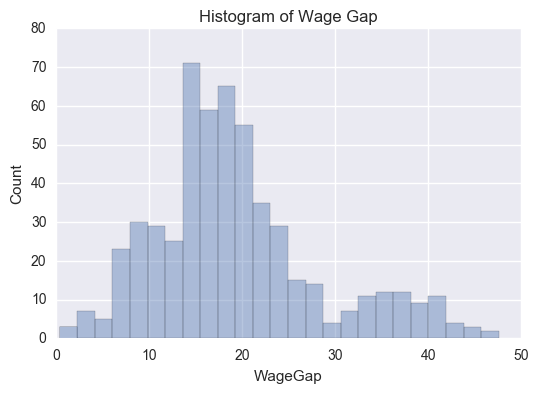

In [15]:
%matplotlib inline
sns.distplot(data_no_na.WageGaP, bins = 25, kde = False)
plt.title('Histogram of Wage Gap')
plt.xlabel('WageGap')
plt.ylabel('Count')
data_no_na.to_csv('data.csv')

## 13 split to X and y

In [16]:
# cols = data_no_na .columns.tolist()
# #sort rows by years:
# data_no_na.sort_values(['Year'],ascending=True, inplace=True)
x = data_no_na[list(data_no_na)[:-1]]
data_no_na.to_csv('dana_no_ca.csv')
x.to_csv('x.csv')

split y to train and test by year

In [17]:
y_train = data_no_na[data_no_na['Year'] < 2010]
y_train = y_train['WageGaP']

y_test = data_no_na[data_no_na['Year'] >= 2010]
y_test = y_test['WageGaP']

## 14 Normelize all values in x

In [18]:
l = list(data_no_na)
x_normelize = pd.DataFrame(sp.MinMaxScaler().fit_transform(data_no_na),columns = l)
x_normelize.drop('WageGaP', axis=1, inplace=True)
x_normelize.head()
x_normelize.to_csv('normelizeX.csv')

## 15 split to train and test data

In [19]:
#train will contain years 1975-2009
#2010 normelized to 0.88
x_train = x_normelize[x_normelize['Year'] < 0.88]
x_test = x_normelize[x_normelize['Year'] >= 0.88]

In [20]:
x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

## 16 Data Modeling

## ML - linear regression

In [21]:
print("Computing regularization path using the coordinate descent lasso...")
n_fold_cv = x_train.shape[0]
model = linear_model.LassoCV(eps=1e-2,n_alphas=100, cv=n_fold_cv).fit(x_train,y_train)
#t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 100, 200
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: best alpha is %.3f' %model.alpha_)
plt.axis('tight')
plt.ylim(ymin, ymax)
plt.show()

Computing regularization path using the coordinate descent lasso...


C:\Users\shiran\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [22]:
#coefficients remaining
model.coef_

array([ -3.17485913,   5.95591769,  -2.77789062,   6.21093835,
        -6.36246694,   0.17249911,  -0.30920195,   8.14889117,
         5.17639082,   0.        ,   3.80068076,  -0.70225967,
        -9.30975173,   0.87135921,  19.14139117,  -2.57250769,
        -0.        ,  -2.90819422,   0.        ,  -5.0865703 ,
        -3.51104913,  -2.91020603,   0.77011752,   0.        ,
         0.        ,  -3.15782291,  -0.23976185,   5.68221903,
         0.        ,   9.75001249,   9.01175573,  -8.62346112,
        -0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
        -2.84868188,  -0.        ,  -0.09857523,   1.57212949,
         0.        ,   0.        ,   0.        ,  -0.        ,
         0.72637663,   0.        ,   0.        ,  -5.54256961,
         0.        ,  -0.        ,   0.        ,   0.  

In [23]:
#get the error
y_hat = model.predict(x_test)
err = metrics.mean_squared_error(y_test,y_hat)
print ('test mse is : %.2f' %err)

test mse is : 11.57


In [24]:
#remaining features
sfm = feature_selection.SelectFromModel(model, prefit=True)
remaining_features = [list(x_train)[i] for i in sfm.get_support(True)]
print ('The renaming features after lasso selection:')
print (len(remaining_features))
remaining_features

The renaming features after lasso selection:
39


['country-full-name_Australia',
 'country-full-name_Austria',
 'country-full-name_Belgium',
 'country-full-name_Canada',
 'country-full-name_Chile',
 'country-full-name_Czech Republic',
 'country-full-name_Denmark',
 'country-full-name_Estonia',
 'country-full-name_Finland',
 'country-full-name_Germany',
 'country-full-name_Greece',
 'country-full-name_Hungary',
 'country-full-name_Ireland',
 'country-full-name_Japan',
 'country-full-name_Latvia',
 'country-full-name_Mexico',
 'country-full-name_New Zealand',
 'country-full-name_Norway',
 'country-full-name_Poland',
 'country-full-name_Portugal',
 'country-full-name_Spain',
 'country-full-name_Sweden',
 'country-full-name_Switzerland',
 'country-full-name_United Kingdom',
 'country-full-name_United States',
 'Year',
 'Employment to population ratio, 15+, female (%) (national estimate)',
 'Employment to population ratio, 15+, total (%) (national estimate)',
 'Employment to population ratio, ages 15-24, female (%) (national estimate)',
 

In [25]:
# list(x_train)

### 17 Visualization 2

## wage gap graph vs year for each country

In [26]:
%matplotlib inline
#create x vector
plot_data = data_no_na
years = set(plot_data['Year'])
years=list(years)
country_colums_list = list(x)[0:countries_count]
y_graphs_dict = {}
#split to x axis (years) and y axis(wage gap)
for country in country_colums_list:
     y_vector = plot_data[plot_data[country] == 1]
     y_vector=pd.DataFrame(y_vector, columns = ['Year','WageGaP'])
     y_graphs_dict[country] = y_vector

#add average
aggregated = plot_data.groupby('Year').mean()['WageGaP']
aggregated_wg = aggregated.to_frame(name='WageGaP_Avg')
np_array_gap_average = aggregated_wg['WageGaP_Avg'].values
y_graphs_dict['WageGapAvg'] = np_array_gap_average.tolist()

plt.show()
plot_tuple = ()
feature_countries = [x for x in remaining_features if x.startswith('country')]
print ('Total Countries {0}'.format(len(country_colums_list)))
print ('Countries in feature list {0}'.format(len(feature_countries)))
for country in country_colums_list:
    color = 'r'
    if country in remaining_features:
        color = 'g'
    plot_tuple =  plot_tuple+(y_graphs_dict[country].Year,y_graphs_dict[country].WageGaP,color)

#ploting average in blue color
plot_tuple =  plot_tuple+(years,y_graphs_dict['WageGapAvg'],'b')

for i in range(0,len(plot_tuple),3):
    plt.plot(plot_tuple[i],plot_tuple[i+1],plot_tuple[i+2])

plt.ylabel('Wage Gap ratio')
plt.xlabel('Years')
plt.title('Wage Gap VS Years for all countries')
plt.xlim(1975,2015)
plt.ylim(-40,70)
plt.show()

Total Countries 31
Countries in feature list 25


## 18 Visualization 3 Prediction vs Data

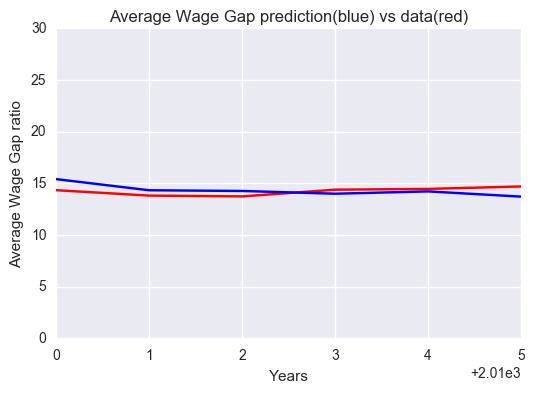

In [27]:
%matplotlib inline
#create x vector
test = data_no_na[data_no_na['Year'] >= 2010]

plot_data = test[['Year','WageGaP']]
plot_data = plot_data.groupby('Year').mean()

cols = test.columns.tolist()
test_2 = test.reset_index(drop=True)
test_2.columns = cols

df_y_hat = pd.DataFrame(data=y_hat,columns=['WageGaPPredict'])

df_prediction = pd.concat([test_2,df_y_hat], axis=1, join='inner')
plot_Prediction = df_prediction[['Year','WageGaPPredict']]
plot_Prediction = plot_Prediction.groupby('Year').mean()

lines = plt.plot(plot_data.index,plot_data.WageGaP,color='r')
lines = plt.plot(plot_Prediction.index,plot_Prediction.WageGaPPredict,color='b')

plt.ylabel('Average Wage Gap ratio')
plt.xlabel('Years')
plt.title('Average Wage Gap prediction(blue) vs data(red)')
plt.ylim(0,30)
plt.show()

19 selected features correlations

In [1]:
from pandas.tools.plotting import scatter_matrix


correlation_cols = [x for x in remaining_features if 'country' not in x]+['WageGaP']
features_df = data_no_na[correlation_cols]

#getting correlation fields code for matrix:
correlation_cols1 = [x for x in remaining_features if 'country' not in x and 'Year' not in x]
full_gender_data = gender_data_raw = pd.read_csv('working_data\GenderStat_Data_new.csv',header=None,skiprows=1)
years_col = range(1960,2018)
full_gender_data.columns = ['country-full-name', 'Country Code', 'Indicator Name', 'Indicator Code']+years_col
full_gender_data=full_gender_data.loc[full_gender_data['Indicator Name'].isin(correlation_cols1)]
name_to_code_correlation_df = full_gender_data[['Indicator Name','Indicator Code']].drop_duplicates()
#replace the columns names with codes
#create dict old-new
names_dict ={}
for index,row in name_to_code_correlation_df.iterrows():
    names_dict[row['Indicator Name']] = row['Indicator Code']

features_df.rename(columns=names_dict, inplace=True)

#output correlations of 2*2 with wage gap field
print ('Correlation of each feature to wageGap:')
features_df['SL.EMP.WORK.FE.ZS']
for feature in names_dict:
    temp_cols = [names_dict[feature],'WageGaP']
    corr_df = features_df[temp_cols]
    scatter_matrix(corr_df, alpha=0.5, figsize=(6, 6), diagonal='kde')

NameError: name 'remaining_features' is not defined

In [ ]:
print ('Selecting correlation groups manually')
group1 = ['SL.EMP.TOTL.SP.FE.NE.ZS','SL.EMP.TOTL.SP.NE.ZS','SL.EMP.1524.SP.FE.NE.ZS','WageGaP']

group2 = ['NY.GDP.MKTP.KD.ZG','NY.GNP.ATLS.CD','WageGaP']
#Mortality rate
group3 = ['SP.DYN.IMRT.IN','SH.DYN.MORT','WageGaP']
group4 = ['SL.EMP.OWAC.FE.ZS','SL.UEM.1524.FM.NE.ZS','SL.EMP.WORK.FE.ZS','WageGaP']
group5 = ['SP.POP.1564.TO.ZS','SE.ENR.PRIM.FM.ZS','SE.PRM.ENRR.FE','WageGaP']

#print scatter matrix
print('Employment to population ratio')
corr_df1 = features_df[group1]
scatter_matrix(corr_df1, alpha=0.7, figsize=(11, 11), diagonal='kde')

print('GDP growth and GNI, Atlas method ')
corr_df2 = features_df[group2]
scatter_matrix(corr_df2, alpha=0.6, figsize=(10, 10), diagonal='kde')

print('Mortality rate')
corr_df3 = features_df[group3]
scatter_matrix(corr_df3, alpha=0.6, figsize=(10, 10), diagonal='kde')

print('Own-account workers, female,Ratio of female to male youth unemployment rate, Wage and salaried workers, female')
corr_df4 = features_df[group4]
scatter_matrix(corr_df4, alpha=0.6, figsize=(10, 10), diagonal='kde')
print('Population ages 15-64, School enrollment')
corr_df5 = features_df[group5]
scatter_matrix(corr_df5, alpha=0.6, figsize=(10, 10), diagonal='kde')